In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('mushroom_encoded.csv')
df.head()

# %%
X= df.drop('class', axis=1)
y = df['class']
le = LabelEncoder()
y = le.fit_transform(y)

# %%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc= accuracy_score(y_test, y_pred,)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")

Accuracy: 0.74
Precision: 0.74
Recall: 0.65
F1 Score: 0.69


In [ ]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [25,50,100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
y_pred = best_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
acc= accuracy_score(y_test, y_pred,)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Random Forest Model:")
print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")

Best Random Forest Model:
Accuracy: 0.75
Precision: 0.76
Recall: 0.64
F1 Score: 0.69


In [5]:
#Gini index to get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances

odor_n                      0.085630
odor_f                      0.083168
stalk-color-below-ring_w    0.012348
cap-shape_x                 0.012154
gill-color_b                0.012140
                              ...   
gill-color_o                0.003544
gill-color_r                0.003433
cap-color_r                 0.003430
gill-color_e                0.003225
veil-type_p                 0.000000
Length: 117, dtype: float64

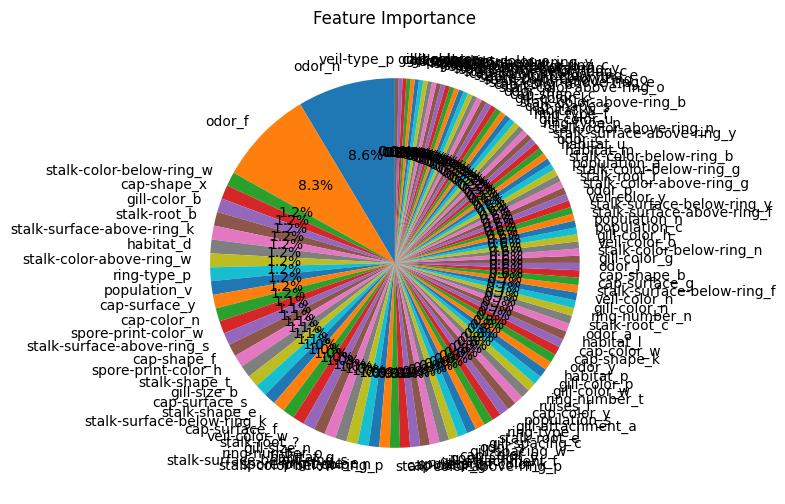

In [ ]:
# # PLot feature importance
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# plt.pie(feature_importances, labels=feature_importances.index, autopct='%1.1f%%', startangle=90)
# plt.title('Feature Importance')
# plt.show()

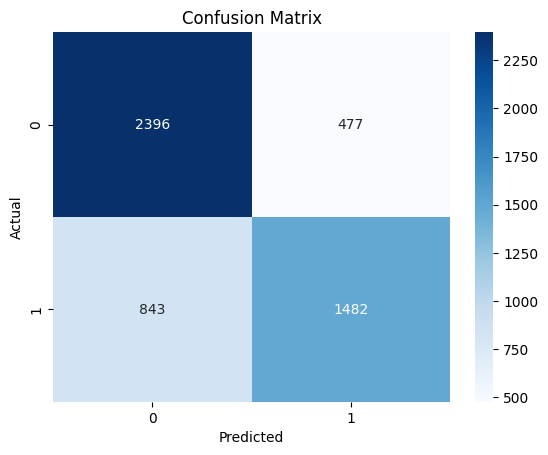

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#train a model that uses the top 10 features
top_features = feature_importances.head(10).index
X_top = X[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [25,50,100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_2 = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

grid_search_2.fit(X_train_top, y_train_top)
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_
print("Best Parameters:", best_params_2)
y_pred_2 = model.predict(X_test_top)

acc= accuracy_score(y_test_top, y_pred_2)
prec = precision_score(y_test_top, y_pred_2)
rec = recall_score(y_test_top, y_pred_2)
f1 = f1_score(y_test_top, y_pred_2)

print("Random Model with top 10 features")
print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Random Model with top 10 features
Accuracy: 0.69
Precision: 0.69
Recall: 0.56
F1 Score: 0.62


In [10]:
import joblib

joblib.dump(best_model, 'rf_model.joblib')

['rf_model.joblib']